<a href="https://colab.research.google.com/github/AakashAhuja30/Machine-Learning/blob/master/ModelsFromScratch/LinearRegression_FromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Linear Regression

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [14]:
X, y = datasets.make_regression(n_samples=100, n_features=1,noise=20,random_state=4)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

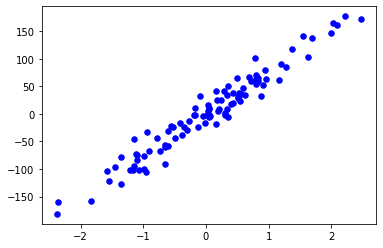

In [16]:
fig = plt.figure()
plt.scatter(X[:,0],y,color = 'b',marker='o', s=30)
plt.show()

In [17]:
X.shape

(100, 1)

In [21]:
class LinearRegression():
  def __init__(self, lr = 0.001, n_iter = 1000):
    self.lr = lr
    self.n_iter = n_iter
    self.weights = None
    self.bias = None

  def fit(self,X,y):
    #Gradient descent
    n_samples, n_features = X.shape
    #init parameters
    self.weights = np.zeros(n_features)
    self.bias = 0

    for _ in range(self.n_iter):
      y_predicted = np.dot(X,self.weights) + self.bias
      dw = (1/n_samples) * np.dot(X.T,(y_predicted - y))
      db = (1/n_samples) * np.sum(y_predicted - y)
      self.weights -= self.lr * dw
      self.bias -= self.lr * db

  def predict(self,X):
    y_predicted = np.dot(X,self.weights) + self.bias
    return y_predicted

In [35]:
regressor = LinearRegression(lr=0.01)
regressor.fit(X_train,y_train)

In [36]:
predicted = regressor.predict(X_test)

In [37]:
predicted

array([  59.46107975,  -48.23362218,   59.36577956, -108.48017766,
         86.87966125,   14.13086936,  -86.20395301,   58.72209254,
        -48.23826315, -100.42080098,   22.46805244,   22.2216393 ,
         11.98665937,   15.67208544,  -74.20465255,    3.6429625 ,
          3.83353015,  -39.32602296, -118.10326087, -114.99744164])

In [38]:
def mse(y_true,y_predicted):
  return np.mean((y_true-y_predicted)**2)

In [39]:
mse_value = mse(y_test,predicted)
print(mse_value)

325.7197246718065


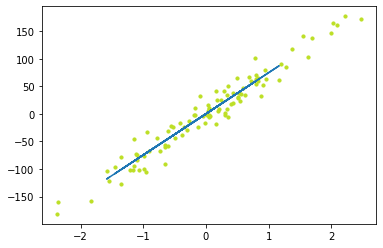

In [42]:
y_pred_line = regressor.predict(X_test)
cmap = plt.get_cmap('viridis')
fig = plt.figure()
m1 = plt.scatter(X_train,y_train,color = cmap(0.9),s=10)
m2 = plt.scatter(X_test,y_test,color = cmap(0.9),s=10)
plt.plot(X_test,y_pred_line)
plt.show()